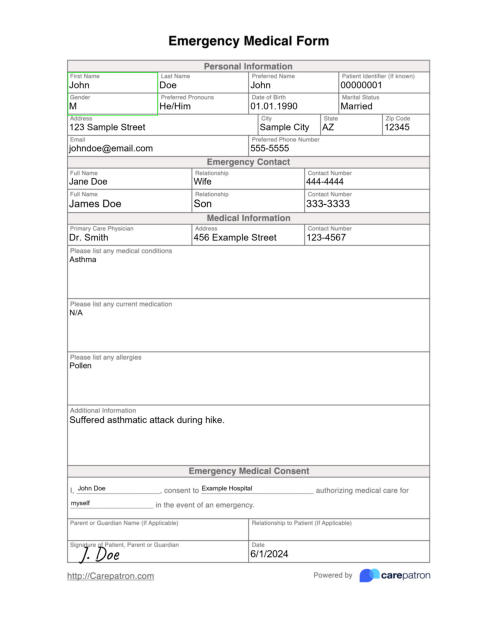

In [13]:
from tools import utils
from tools.TextExtractor import TextExtractor
from tools.ImageProcessor import ImageProcessor
from tools.ImageCropper import ImageCropper
import os
import cv2
import matplotlib.pyplot as plt
import tesserocr
import numpy as np
from PIL import Image
from pdf2image import convert_from_path
import time

with tesserocr.PyTessBaseAPI() as api:
    clean_image_func = ImageProcessor()
    extractor = TextExtractor(api, clean_image_func=clean_image_func)
    # image_path = 'test_images/SampleText.jpg'
    # gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    start = time.time()

    pdf_path = os.path.join('..', 'example-forms', 'emergency-medical-form.pdf')
    image = convert_from_path(pdf_path, dpi=300)[0]
    image = np.array(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # image = cv2.imread(weird, cv2.IMREAD_GRAYSCALE)    

    clean_img = clean_image_func(gray_image)

    # Seg_extractor = ImageCropper()
    # Seg_extractor.get_tess_auto_segments(clean_img, api, tesserocr.RIL.PARA)
    # images = Seg_extractor(clean_img)

    # Manually enter bounding box coordinates
    left, top = 310, 335
    right, bottom = 790, 565

    # Draw bounding box on image
    image_with_bbox = cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

    # Display image with bounding box
    plt.figure(figsize=(10, 8))
    plt.imshow(image_with_bbox)
    plt.axis('off')
    plt.show()